 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\dtcos\\Class_Repo\\cu-nyc-fin-pt-12-2020-u-c\\02-Homework\\04-Pandas\\Instructions\\Starter_Code'

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [147]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
print(algo_returns.isnull().sum())
print(algo_returns[algo_returns.isnull().any(axis = 1)])

Algo 1    0
Algo 2    6
dtype: int64
              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
2014-06-04 -0.001838     NaN


In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [148]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace("$", " ").astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns 
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195


In [13]:
# Count nulls
print(sp500_daily_returns.isnull().sum())

Close    1
dtype: int64


In [14]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head(10)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"S&P 500"}, inplace = True)
sp500_daily_returns.head(10)

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


## Combine Whale, Algorithmic, and S&P 500 Returns

In [115]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
appended_data = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

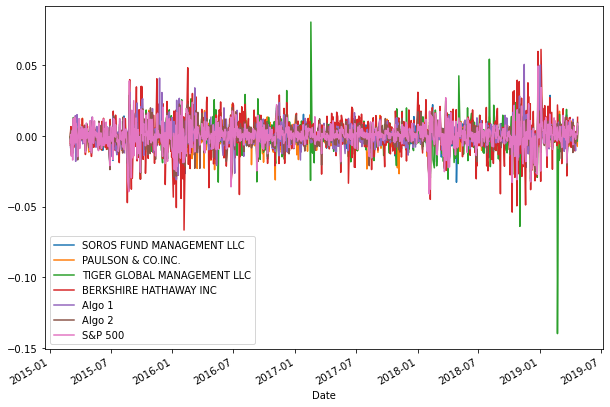

In [122]:
# Plot daily returns of all portfolios
appended_data.plot(figsize = (10, 7));

#### Calculate and Plot cumulative returns.

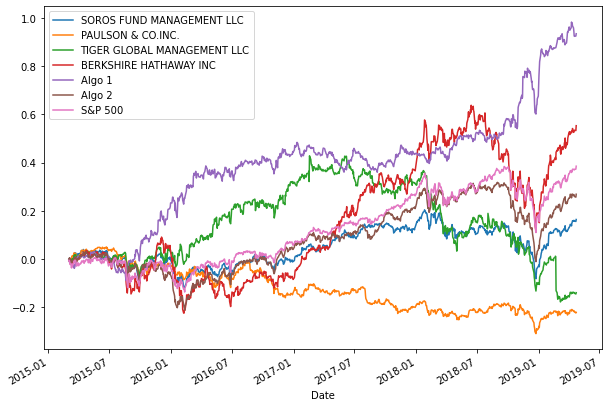

In [121]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + appended_data).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize = (10, 7));

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


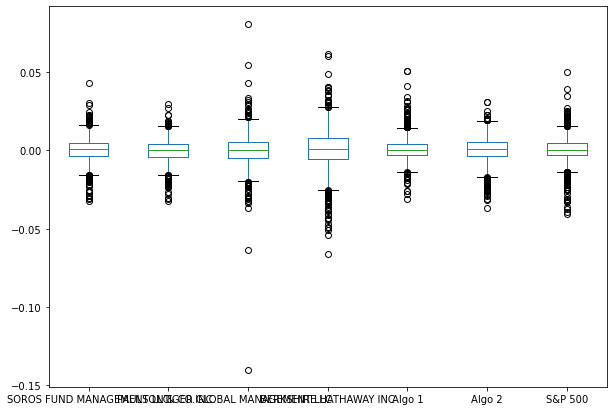

In [120]:
# Box plot to visually show risk
appended_data.plot(kind = "box", figsize = (10, 7));

### Calculate Standard Deviations

In [111]:
# Calculate the daily standard deviations of all portfolios
appended_data_std = pd.DataFrame(appended_data.std()).rename(columns = {0:"Standard Deviation"})
#Sort data by standard deviation 
appended_data_std.sort_values("Standard Deviation", ascending = False)

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894
S&P 500,0.008554
Algo 2,0.008342
SOROS FUND MANAGEMENT LLC,0.007895
Algo 1,0.007620
PAULSON & CO.INC.,0.007023


In [110]:
# Calculate  the daily standard deviation of S&P 500
df_sp500_std = pd.DataFrame(sp500_daily_returns.std()).rename(columns = {0 : "Standard Deviation"})
df_sp500_std

,Standard Deviation
S&P 500,0.008111


### Determine which portfolios are riskier than the S&P 500

In [109]:
# Determine which portfolios are riskier than the S&P 500
higher_std = appended_data_std[appended_data_std["Standard Deviation"] > appended_data_std.loc["S&P 500", "Standard Deviation"]]
higher_std

,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [23]:
#Tiger Global Mananagement LLC and Berkshire Hathaway INC have higher volatility than S&P 500

### Calculate the Annualized Standard Deviation

In [108]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = appended_data_std*np.sqrt(252)
annualized_std.sort_values("Standard Deviation", ascending = False)

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.205077
TIGER GLOBAL MANAGEMENT LLC,0.172936
S&P 500,0.135786
Algo 2,0.132430
SOROS FUND MANAGEMENT LLC,0.125335
Algo 1,0.120967
PAULSON & CO.INC.,0.111488


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

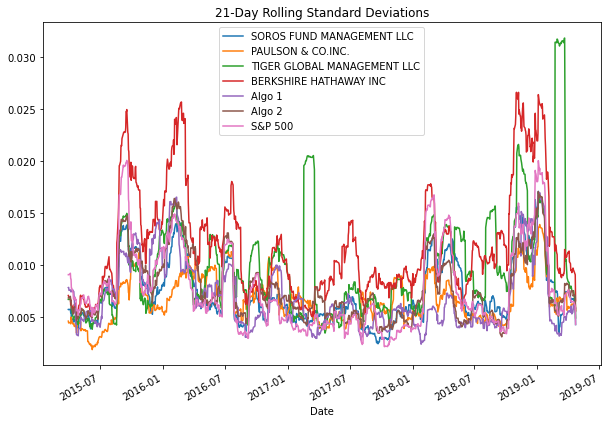

In [119]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
sp500_rolling_std = appended_data.rolling(window=21).std()
sp500_rolling_std.plot(figsize = (10, 7), title="21-Day Rolling Standard Deviations");


### Calculate and plot the correlation

In [106]:
# Calculate the correlation
# Display de correlation matrix
correlation = appended_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

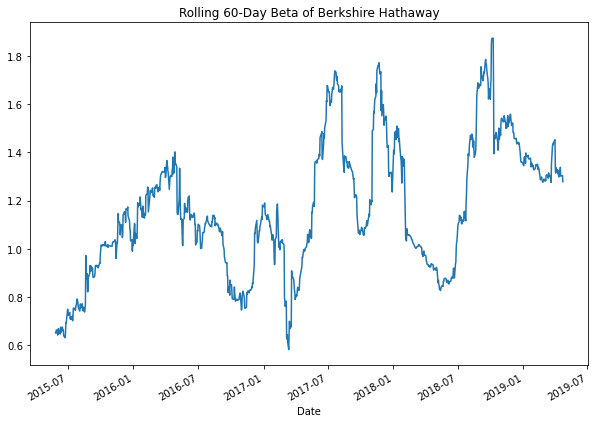

In [118]:
# Calculate covariance of a single portfolio
rolling_covariance = appended_data["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(appended_data["S&P 500"])

# Calculate variance of S&P 500
rolling_variance = appended_data["S&P 500"].rolling(window=60).var()

# Computing beta
# Plot beta trend
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(10, 7), title='Rolling 60-Day Beta of Berkshire Hathaway');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

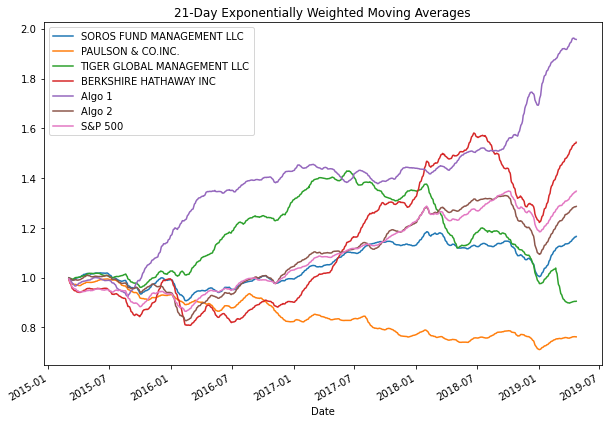

In [117]:
#21 Day EWMA not sure if this is the same as "half-life"
rolling_ewm = appended_data.ewm(span = 21, adjust = False).mean()
(1 + rolling_ewm).cumprod().plot(figsize = (10, 7), title="21-Day Exponentially Weighted Moving Averages");


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [103]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = appended_data.mean()* 252 / (appended_data.std()*np.sqrt(252))
annualized_sharpe_ratios = annualized_sharpe_ratios.sort_values(ascending=False)
annualized_sharpe_ratios

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

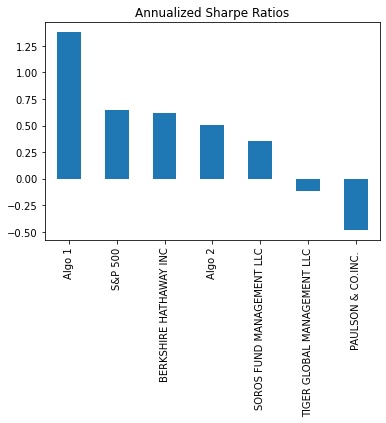

In [116]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_sorted = annualized_sharpe_ratios.sort_values(ascending=False)
annualized_sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios");

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---Algo 1 had a higher Sharpe than the market (S&P 500) and ALL whales portfolio

---Algo 2 had a lower Sharpe than the market (S&P 500) and Berkshire Hathaway yet higher than Soros Fund, Tiger Global Management and Paulson & Co.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [37]:
# Reading data from 1st stock 
google_returns_csv = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(google_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Drop "Symbol" column:
google_df = google_df.drop('Symbol', axis=1)

# Rename column to identify "GOOG":
google_df.columns = ["GOOG"]

In [38]:
# Reading data from 2nd stock 
apple_returns_csv = Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Drop "Symbol" column:
apple_df = apple_df.drop('Symbol', axis=1)

# Rename column to identify "AAPL":
apple_df.columns = ["AAPL"]

In [39]:
# Reading data from 3rd stock 
costco_returns_csv = Path("Resources/cost_historical.csv")
costco_df = pd.read_csv(costco_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Drop "Symbol" column:
costco_df = costco_df.drop('Symbol', axis=1)

# Rename column to identify "COST":
costco_df.columns = ["COST"]


In [34]:
# Combine all stocks in a single DataFrame 
my_stocks = pd.concat((google_df, apple_df, costco_df), axis = 1, join= "inner")


In [52]:
# Reset Date index
my_stocks.index = my_stocks.index.normalize()

In [44]:
# Reorganize portfolio data by having a column per symbol


In [51]:
# Calculate daily returns


#my_portfolio = my_stocks.pct_change()
# Drop NAs
#my_stocks.sort_index(ascending = True, inplace = True)
# Display sample data
my_stocks.head(10)

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
2018-05-18,1066.36,186.31,198.96
2018-05-21,1079.58,187.63,199.62
2018-05-22,1069.73,187.16,198.97
2018-05-23,1079.69,188.36,198.14


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [53]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data
weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [56]:
# Join your returns DataFrame to the original returns DataFrame

portfolio_returns = pd.concat((my_portfolio_returns,appended_data), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [135]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [145]:
# Calculate the standard deviation
portfolio_data_std2 = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"Standard Deviation"})
portfolio_data_std2.sort_values("Standard Deviation", ascending = False)

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.015569
TIGER GLOBAL MANAGEMENT LLC,0.014648
my_portfolio,0.014413
S&P 500,0.009578
SOROS FUND MANAGEMENT LLC,0.009240
Algo 2,0.008791
Algo 1,0.008423
PAULSON & CO.INC.,0.007353


In [100]:
# Calculate the annualized standard deviation
annualized_std2 = portfolio_data_std*np.sqrt(252)
annualized_std2.sort_values("Standard Deviation", ascending = False)

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.247155
TIGER GLOBAL MANAGEMENT LLC,0.232531
my_portfolio,0.228804
S&P 500,0.152054
SOROS FUND MANAGEMENT LLC,0.146675
Algo 2,0.139556
Algo 1,0.133704
PAULSON & CO.INC.,0.116732


### Calculate and plot rolling `std` with 21-day window

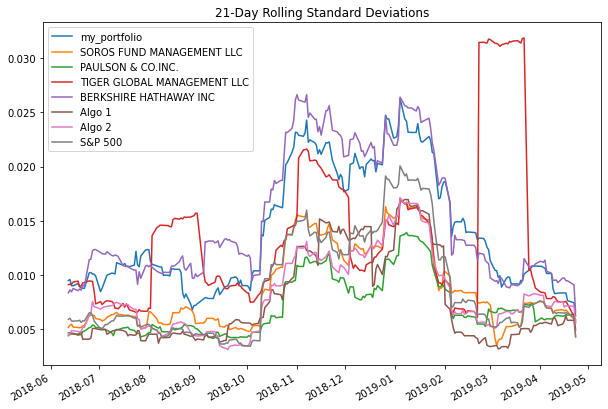

In [125]:
# Calculate rolling standard deviation
rolling_std2 = portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std2.plot(figsize = (10, 7), title="21-Day Rolling Standard Deviations");


### Calculate and plot the correlation

In [98]:
# Calculate and plot the correlation
correlation2 = portfolio_returns.corr()
correlation2

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
my_portfolio,1.000000,0.724218,0.606450,0.340536,0.841143,0.275728,0.725587,0.847217
SOROS FUND MANAGEMENT LLC,0.724218,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.606450,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.340536,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.841143,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.275728,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.725587,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500,0.847217,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

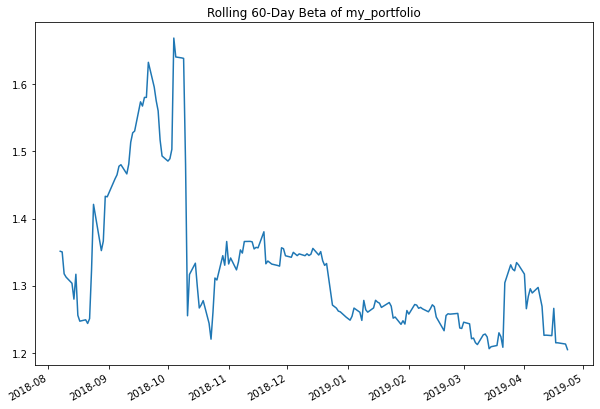

In [124]:
# Calculate and plot Beta
rolling_covariance2 = portfolio_returns["my_portfolio"].rolling(window=60).cov(appended_data["S&P 500"])

# Calculate variance of S&P 500
rolling_variance2 = portfolio_returns["S&P 500"].rolling(window=60).var()

# Computing beta
# Plot beta trend
rolling_beta2 = rolling_covariance2 / rolling_variance2
rolling_beta2.plot(figsize=(10, 7), title='Rolling 60-Day Beta of my_portfolio');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [128]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
annualized_sharpe_ratios2 = portfolio_returns.mean()* 252 / (portfolio_returns.std()*np.sqrt(252))
annualized_sharpe_ratios2 = annualized_sharpe_ratios2.sort_values(ascending=False)
annualized_sharpe_ratios2

Algo 1                         2.035665
my_portfolio                   0.797793
S&P 500                        0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

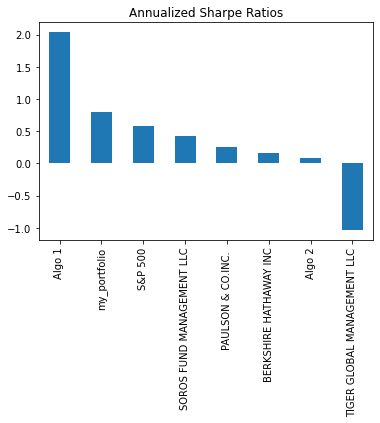

In [129]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_sorted2 = annualized_sharpe_ratios2.sort_values(ascending=False)
annualized_sharpe_ratios2.plot(kind = "bar", title = "Annualized Sharpe Ratios");

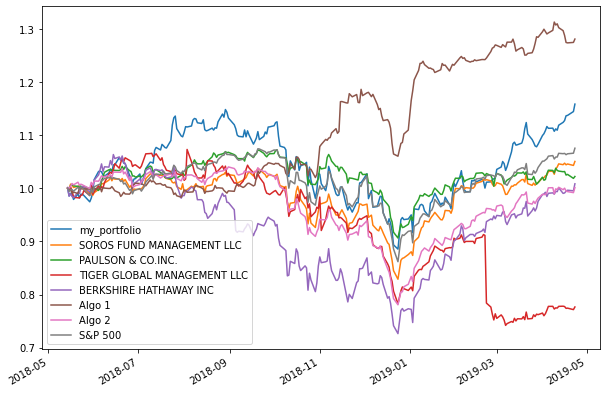

In [146]:
#Extra Cummulative returns
df_cum2 = (1+ portfolio_returns).cumprod()
df_cum2.plot(figsize = (10, 7));

### How does your portfolio do?
When it comes to Sharpe ratio my_portfolio trailed only Algo 1 which means it had higher risk adjusted returns than all whales investors and Algo 2.

